# In this assignment, we will work on image classification using PyTorch.

• Download the intel image dataset from Kaggle.

• We will use the OpenCV image feature extraction library.
(conda install -c conda-forge opencv)


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Question 1: Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped.

In [2]:
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

X_train, y_train = [], []
for label in CNAMES:
    path = r'/Users/katieross/desktop/archive-5' + '/seg_train/seg_train/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_train += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)] 
        y_train += [CNAMES.index(label)]

0


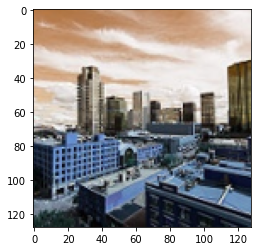

In [3]:
plt.imshow(X_train[1])
print(y_train[1])

2


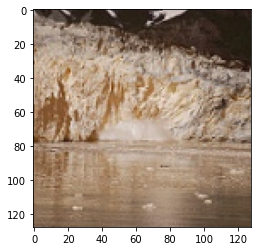

In [4]:
plt.imshow(X_train[5000])
print(y_train[5000])

3


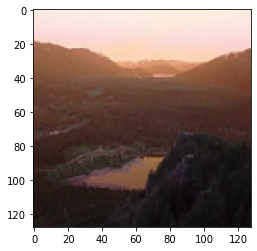

In [5]:
plt.imshow(X_train[7000])
print(y_train[7000])

In [6]:
IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

X_test, y_test = [], []
for label in CNAMES:
    path = r'/Users/katieross/desktop/archive-5' + '/seg_test/seg_test/' + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_test += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)] 
        y_test += [CNAMES.index(label)]

0


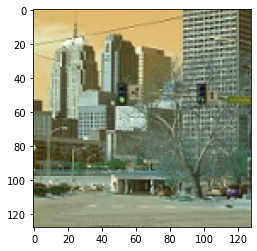

In [7]:
plt.imshow(X_test[1])
print(y_test[1])

1


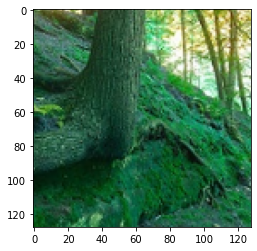

In [8]:
plt.imshow(X_test[500])
print(y_test[500])

## How many color channels are there?
There are 3 color channels r, b, g.

# Question 2: Convert the imageset to numpy array, such as the array size:(14034, 128, 128, 3). Scale the imageset to [0-1].

In [9]:
# Convert to numpy array
X_train = np.asarray(X_train)

In [10]:
print(X_train.shape)

(14034, 128, 128, 3)


In [11]:
# Scale the imageset
X_train = X_train/255

# Question 3: Create a neural network to train and report its performance on the testing portion of the dataset. 

### Train Neural Network

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [13]:
# Convert to tensors
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)

In [14]:
# Flatten data
X_train = torch.flatten(X_train, start_dim=1)

In [15]:
X_train.shape

torch.Size([14034, 49152])

In [16]:
y_train.shape

torch.Size([14034])

In [17]:
class MyNetwork(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(49152, 100)  # A simple input layer
        self.fc2 = nn.Linear( 100, 100)  # A simple hidden layer
        self.fc3 = nn.Linear( 100,  6)  # A simple output layer

    def forward(self, x, apply_softmax=False):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        if apply_softmax:
            x = F.softmax(x, dim=1)
        return x

In [22]:
# Instantiate the neural network
Net1 = MyNetwork()
print(Net1)

# Set the learning rate - this part is magic of course
eta = 0.001

MyNetwork(
  (fc1): Linear(in_features=49152, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=6, bias=True)
)


In [23]:
# Create a Stochastic Gradient Descent optimizer
optimizer = optim.SGD(Net1.parameters(), lr=eta, momentum=0.9)

# Create the loss function
loss_func = nn.CrossEntropyLoss()

In [24]:
def predict(_x):
    net_out = Net1.forward(_x, apply_softmax=True)
    p_values, indices = net_out.max(dim=1)
    return indices

In [25]:
import sys

epochs=200
minibatch_size=1000

# The main training loop
for i in range(epochs):
    indices = np.arange(X_train.shape[0])
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        # step 1.
        optimizer.zero_grad()
        # step 2.
        net_out = Net1.forward(X_train[batch_idx].float())
        # step 3.
        loss = loss_func(net_out, y_train[batch_idx])
        # step 4.
        loss.backward()
        # step 5.
        optimizer.step()

    y_pred = predict(X_train.float())
    
    train_acc = (torch.sum(y_train == y_pred).float() / X_train.shape[0])
    
    sys.stderr.write(f"\r{i+1}/{epochs} | Cost: {loss:.2f} | Train Acc.: {train_acc*100:.2f}%")
    sys.stderr.flush()

200/200 | Cost: 1.12 | Train Acc.: 56.10%

### Test on testing set

In [26]:
# Convert to numpy array
X_test = np.asarray(X_test)

In [27]:
print(X_test.shape)

(3000, 128, 128, 3)


In [28]:
# Scale the imageset
X_test = X_test/255

In [29]:
# Convert to tensors
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)

In [30]:
# Flatten data
X_test = torch.flatten(X_test, start_dim=1)

In [31]:
X_test.shape

torch.Size([3000, 49152])

In [32]:
y_pred = predict(X_test.float())
test_acc = (torch.sum(y_test == y_pred).float() / X_test.shape[0])

print(f"Feedforward NN testing accuracy= {test_acc:.2f}")

Feedforward NN testing accuracy= 0.54


# Question 4: Research and find out how to improve the neural network model to solve this problem. Outline an approach.

Tuning the hyperparameters can help improve the performance of a neural network.  I would experiment with different learning rates, batch sizes, and the number of epochs to see if the accuracy can be improved with the given structure of the model.  I would then try using different optimizers with a variety of hyperparamters.

Further improvement of the model can be achieved by adding additional layers to the neural network.  Since this model only has one hidden layer, I would begin by adding a second.  After this step, I would check the learning accuracy with the testing accuracy to be sure that overfitting has not become a problem.  If the addition of additional layers causes overfitting, a dropout layer could be added to correct for this.